In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [5]:

engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()


In [6]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
base.prepare(engine, reflect=True)
base.classes.keys()




C:\Users\devpreet.singh\Anaconda3\lib\site-packages\sqlalchemy\ext\declarative\clsregistry.py:129: SAWarning: This declarative base already contains a class with the same class name and module name as sqlalchemy.ext.automap.measurement, and will be replaced in the string-lookup table.
  % (item.__module__, item.__name__)
C:\Users\devpreet.singh\Anaconda3\lib\site-packages\sqlalchemy\ext\declarative\clsregistry.py:129: SAWarning: This declarative base already contains a class with the same class name and module name as sqlalchemy.ext.automap.station, and will be replaced in the string-lookup table.
  % (item.__module__, item.__name__)


['measurement', 'station']

In [8]:
data_measurement = pd.read_sql("SELECT * FROM measurement", conn)
data_measurement


,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [9]:
data_station = pd.read_sql("SELECT * FROM station", conn)
data_station

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [10]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [11]:
# Create our session (link) from Python to the DB
                        
session = Session(engine)


In [12]:
inspector = inspect(engine)
inspector.get_table_names()



['measurement', 'station']

In [13]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
precipitation = session.query(measurement).first()
precipitation.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2bb746ad088>,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397'}

# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#session.query(measurement.date, measurement.prcp)
#last_year_date = session.query(measurement.date

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp).order_by(measurement.date.desc()).filter(measurement.date > "2016-08-23").all()

for row in session.query(measurement.date, measurement.prcp).order_by(measurement.date.desc()).\
    filter(measurement.date > "2016-08-23").all():
         print(row)


('2017-08-23', 0.0)
('2017-08-23', 0.0)
('2017-08-23', 0.08)
('2017-08-23', 0.45)
('2017-08-22', 0.0)
('2017-08-22', 0.0)
('2017-08-22', 0.5)
('2017-08-21', 0.0)
('2017-08-21', 0.02)
('2017-08-21', None)
('2017-08-21', 0.56)
('2017-08-20', 0.0)
('2017-08-20', 0.01)
('2017-08-20', None)
('2017-08-19', 0.0)
('2017-08-19', 0.0)
('2017-08-19', None)
('2017-08-19', 0.09)
('2017-08-18', 0.0)
('2017-08-18', 0.0)
('2017-08-18', 0.06)
('2017-08-18', None)
('2017-08-17', 0.0)
('2017-08-17', 0.05)
('2017-08-17', 0.01)
('2017-08-17', 0.13)
('2017-08-16', 0.0)
('2017-08-16', 0.07)
('2017-08-16', 0.12)
('2017-08-16', 0.42)
('2017-08-15', 0.02)
('2017-08-15', 0.0)
('2017-08-15', 0.06)
('2017-08-15', 0.32)
('2017-08-15', 0.42)
('2017-08-14', 0.0)
('2017-08-14', 0.01)
('2017-08-14', 0.08)
('2017-08-14', 0.0)
('2017-08-14', 0.22)
('2017-08-13', 0.0)
('2017-08-13', None)
('2017-08-13', 0.0)
('2017-08-13', 0.0)
('2017-08-13', None)
('2017-08-12', 0.0)
('2017-08-12', 0.0)
('2017-08-12', 0.14)
('2017-08-11'

('2016-10-16', 0.0)
('2016-10-16', 0.0)
('2016-10-15', 0.0)
('2016-10-15', 0.0)
('2016-10-15', 0.02)
('2016-10-15', 0.0)
('2016-10-15', 0.04)
('2016-10-15', 0.33)
('2016-10-14', 0.0)
('2016-10-14', 0.0)
('2016-10-14', 0.0)
('2016-10-14', 0.0)
('2016-10-14', 0.0)
('2016-10-14', 0.0)
('2016-10-13', 0.0)
('2016-10-13', 0.0)
('2016-10-13', 0.02)
('2016-10-13', None)
('2016-10-13', 0.0)
('2016-10-13', 0.0)
('2016-10-13', 0.06)
('2016-10-12', 0.0)
('2016-10-12', 0.03)
('2016-10-12', 0.0)
('2016-10-12', 0.0)
('2016-10-12', 0.03)
('2016-10-12', 0.02)
('2016-10-11', 0.0)
('2016-10-11', 0.02)
('2016-10-11', 0.04)
('2016-10-11', None)
('2016-10-11', 0.0)
('2016-10-11', 0.28)
('2016-10-11', 0.35)
('2016-10-10', 0.0)
('2016-10-10', 0.0)
('2016-10-10', None)
('2016-10-10', 0.0)
('2016-10-10', 0.0)
('2016-10-10', 0.0)
('2016-10-09', 0.0)
('2016-10-09', 0.0)
('2016-10-09', 0.0)
('2016-10-09', 0.0)
('2016-10-09', 0.0)
('2016-10-08', 0.0)
('2016-10-08', 0.0)
('2016-10-08', 0.0)
('2016-10-08', 0.0)
('201

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_p = pd.DataFrame(precipitation, columns=['Date', 'Precipitation'])
df_p.set_index('Date', inplace=False )
df_p
# Sort the dataframe by date
df_p.sort_values(by='Date')
# Use Pandas Plotting with Matplotlib to plot the data


,Date,Precipitation
2222,2016-08-24,1.45
2216,2016-08-24,0.08
2217,2016-08-24,2.15
2221,2016-08-24,2.15
2219,2016-08-24,NaN
...,...,...
4,2017-08-22,0.00
3,2017-08-23,0.45
2,2017-08-23,0.08
1,2017-08-23,0.00


<function matplotlib.pyplot.show(*args, **kw)>

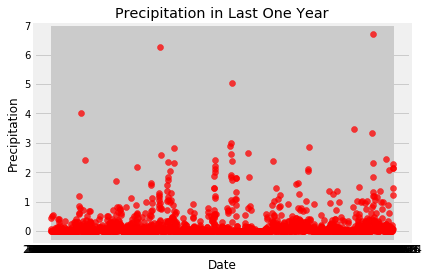

In [17]:
plt.title("Precipitation in Last One Year")
plt.xlabel("Date")
plt.ylabel("Precipitation")

plt.scatter(df_p.Date, df_p.Precipitation, marker="o", facecolors="red", alpha=0.75)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

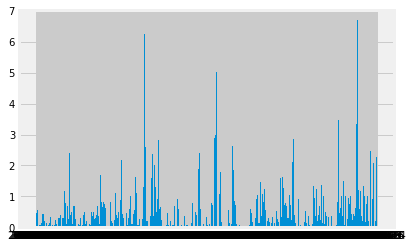

In [39]:
plt.title("Precipitation in Last One Year")
plt.xlabel("Date")
plt.ylabel("Precipitation")

plt.bar(df_p.Date, df_p.Precipitation, width=1, align='center')
plt.tick_params(labelbottom='on')
plt.show


In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df_p.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# Design a query to show how many stations are available in this dataset?
from sqlalchemy import distinct

# count distinct "name" values
stations = []
for row in session.query(measurement.station).filter(measurement.date > "2016-08-23").distinct():
    stations.append(row)
  
print (f' Total number of stations are {len(stations)}')
print (f' Stations are {stations}')

 Total number of stations are 7
 Stations are [('USC00519397',), ('USC00513117',), ('USC00514830',), ('USC00517948',), ('USC00519523',), ('USC00519281',), ('USC00516128',)]


In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_data = session.query(measurement.date, measurement.station, measurement.prcp).order_by(measurement.date.desc()).filter(measurement.date > "2016-08-23").all()

df_s = pd.DataFrame(station_data, columns=['Date', 'Station', 'Precipitation'])
df_s_clean = df_s.dropna()

grouped_station = df_s_clean.groupby(['Station']).count().sort_values(['Date'],ascending=False)

grouped_station.reset_index()

        


,Station,Date,Precipitation
0,USC00519397,358,358
1,USC00519281,351,351
2,USC00513117,342,342
3,USC00516128,327,327
4,USC00519523,313,313
5,USC00514830,264,264
6,USC00517948,60,60


In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_data_temp = session.query(measurement.date, measurement.station, measurement.tobs).order_by(measurement.date.desc()).filter(measurement.date > "2016-08-23").all()

df_t = pd.DataFrame(station_data_temp, columns=['Date', 'Station', 'Temperature'])
df_t_clean = df_t.dropna()


df_t_clean_filter = df_t_clean.loc[df_t_clean['Station'] == "USC00519397"]
df_t_clean_filter



,Date,Station,Temperature
0,2017-08-23,USC00519397,81.0
4,2017-08-22,USC00519397,82.0
7,2017-08-21,USC00519397,81.0
11,2017-08-20,USC00519397,81.0
14,2017-08-19,USC00519397,79.0
...,...,...,...
2191,2016-08-28,USC00519397,78.0
2197,2016-08-27,USC00519397,77.0
2203,2016-08-26,USC00519397,79.0
2209,2016-08-25,USC00519397,80.0


In [22]:
min_temp = df_t_clean_filter['Temperature'].min()
max_temp = df_t_clean_filter['Temperature'].max()
avg_temp = df_t_clean_filter['Temperature'].mean()

print (f' Minimum Temperatue is {min_temp}')
print (f' Maximum Temperatue is {max_temp}')
print (f' Average Temperatue is {avg_temp}')

 Minimum Temperatue is 60.0
 Maximum Temperatue is 87.0
 Average Temperatue is 75.19444444444444


In [23]:
df_t_clean_filter['Month'] = pd.DatetimeIndex(df_t_clean_filter['Date']).month
df_t_clean_filter['Year'] = pd.DatetimeIndex(df_t_clean_filter['Date']).year
df_t_clean_filter

C:\Users\devpreet.singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\devpreet.singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Station,Temperature,Month,Year
0,2017-08-23,USC00519397,81.0,8,2017
4,2017-08-22,USC00519397,82.0,8,2017
7,2017-08-21,USC00519397,81.0,8,2017
11,2017-08-20,USC00519397,81.0,8,2017
14,2017-08-19,USC00519397,79.0,8,2017
...,...,...,...,...,...
2191,2016-08-28,USC00519397,78.0,8,2016
2197,2016-08-27,USC00519397,77.0,8,2016
2203,2016-08-26,USC00519397,79.0,8,2016
2209,2016-08-25,USC00519397,80.0,8,2016


In [24]:

Avg_temp_monthly = []
Months = ["Jan'17", "Feb'17", "Mar'17", "Apr'17", "May'17", "Jun'17", "Jul'17", "Aug'17", "Sept'16", "Oct'16", "Nov'16", "Dec'16"]
for a in range(1,13):
    
    Avg_temp_month = []
    
    for index, row in df_t_clean_filter.iterrows():
        
        if row["Month"] == a:
                if row["Month"] == 8:  
                    if row["Year"] == 2016:
                        print(row["Temperature"]) 
                    else: 
                        Avg_temp_month.append(row["Temperature"])
                else: 
                    Avg_temp_month.append(row["Temperature"])
    
    if len(Avg_temp_month) != 0:
        avg = sum(Avg_temp_month)/len(Avg_temp_month)
        Avg_temp_monthly.append(avg)
    
print (Avg_temp_monthly)

80.0
79.0
78.0
78.0
77.0
79.0
80.0
79.0
[67.2258064516129, 69.53571428571429, 72.35483870967742, 75.46666666666667, 77.55172413793103, 79.2, 79.96666666666667, 79.57142857142857, 78.56666666666666, 78.38709677419355, 74.43333333333334, 70.54838709677419]


In [25]:
d = {'Months': Months, 'AverageTemperature': Avg_temp_monthly }
Temp_avg_monthly = pd.DataFrame(d)
Temp_avg_monthly

,Months,AverageTemperature
0,Jan'17,67.225806
1,Feb'17,69.535714
2,Mar'17,72.354839
3,Apr'17,75.466667
4,May'17,77.551724
5,Jun'17,79.200000
6,Jul'17,79.966667
7,Aug'17,79.571429
8,Sept'16,78.566667
9,Oct'16,78.387097


<function matplotlib.pyplot.show(*args, **kw)>

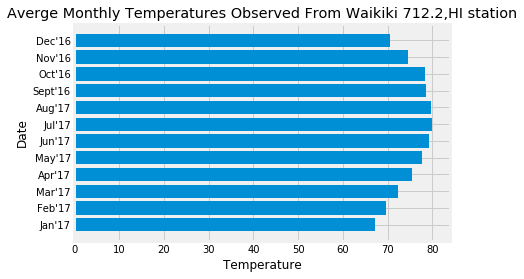

In [27]:
plt.title("Averge Monthly Temperatures Observed From Waikiki 712.2,HI station")
plt.xlabel("Temperature")
plt.ylabel("Date")

plt.barh(Temp_avg_monthly.Months, Temp_avg_monthly.AverageTemperature, height=0.8, left=None, align='center')
plt.show

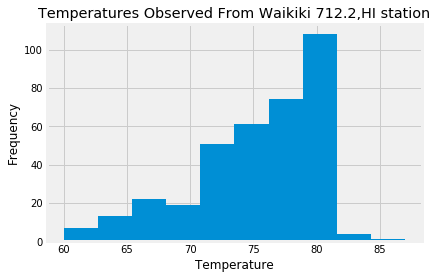

In [40]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

plt.title("Temperatures Observed From Waikiki 712.2,HI station")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.hist(df_t_clean_filter.Temperature, bins = 10, histtype='bar', align='mid', orientation='vertical')
plt.show()

## Bonus Challenge Assignment

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [29]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [30]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [31]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [32]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

NameError: name 'Measurement' is not defined

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
